In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import pylab as pl
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tomto\AppData\Local\Temp\ipykernel_1456\3165019849.py:31: UserWarning: The following kwargs were not used by contour: 'lw'
  ax2.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),


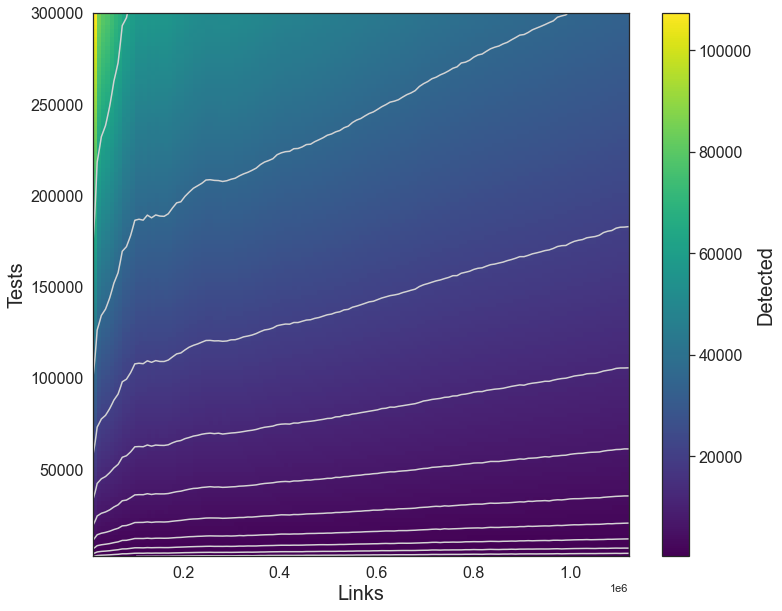

In [2]:
# MAPA DE CALOR: DOS FORMAS
name = 'bogota_transport'
sns.set_theme(style="white")

fig, ax2 = plt.subplots(1, 1, figsize=(12, 10))
betastr = '8,0'
heatmap = pd.read_csv('out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'tests', 'detected', 'error'])
# PIVOT TABLE
x = heatmap['links'].to_numpy()
y = heatmap['tests'].to_numpy()
z = heatmap['detected'].to_numpy()

colormap = 'viridis'

# Niveles para hacer líneas de contorno blancas (en escala logaritmica)
# np.floor(np.log10(z.min())-4),
lev_exp = np.linspace(np.log10(z.min()+0.00000001), np.log10(z.max()), 12)
# np.ceil(np.log10(z.max())+4), 4)
levs = np.power(10.0, lev_exp)

lev_exp_contour = lev_exp
levs_contour = np.power(10.0, lev_exp_contour)

shape_x = len(np.unique(x))
shape_y = len(np.unique(y))

# imshow para dibujar simplemente el mapa, sin marcar contornos
ax2.imshow(np.flip(z.reshape(shape_x, shape_y), 1).transpose(), extent=(x.min(), x.max(), y.min(), y.max()), aspect='auto',
            cmap=colormap, norm=Normalize(levs.min()+0.01, levs.max()))  # , norm=LogNorm(levs.min(),levs.max()))
ax2.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),
            norm=Normalize(levs.min()+0.01, levs.max()), colors='lightgrey', lw=2)  # , norm=LogNorm(levs.min(),levs.max()))

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min(levs), vmax=max(levs)))
#sm.set_array([])
cbar2 = fig.colorbar(sm, ax=ax2)

ax2.set_xlabel('Links', size=20)
ax2.set_ylabel('Tests', size=20)
ax2.tick_params(labelsize=16)

cbar2.ax.tick_params(labelsize=16)
cbar2.ax.set_ylabel('Detected', size=20)

plt.savefig('this.pdf', dpi=150, bbox_inches="tight")

In [3]:
name = 'bogota'

betastr = '8,0'
tests = pd.read_csv('out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'tests', 'detected', 'error'])

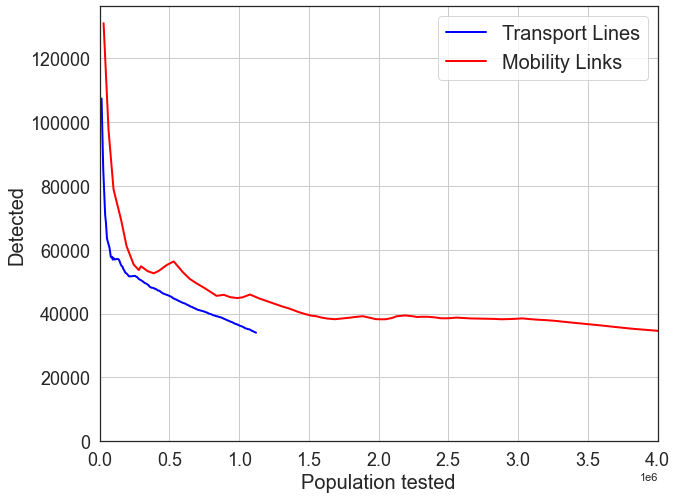

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

transport = heatmap[heatmap['tests']==300000]
links = tests[tests['tests']==300000]

#temporal['links'] = 10 * temporal['links']/temporal['links'].max()
#temporal2['links'] = temporal2['links']/temporal2['links'].max()

ax.plot(transport['links'], transport['detected'], label='Transport Lines', c = 'blue', lw=2)
ax.plot(links['links'], links['detected'], label='Mobility Links', c = 'red', lw=2)

lower = links['detected'].min()
#ax.plot([0,7100000], [lower, lower], label='Uniform', c = 'grey', lw = 2, linestyle = 'dashed')

ax.legend(fontsize=20)

ax.set_xlabel('Population tested', size=20)
ax.set_ylabel('Detected', size=20)
ax.tick_params(labelsize=18)
ax.set_xlim(0,4e6)
ax.set_ylim(0,)

ax.grid('True')

plt.savefig('this.png', dpi=220, bbox_inches="tight")

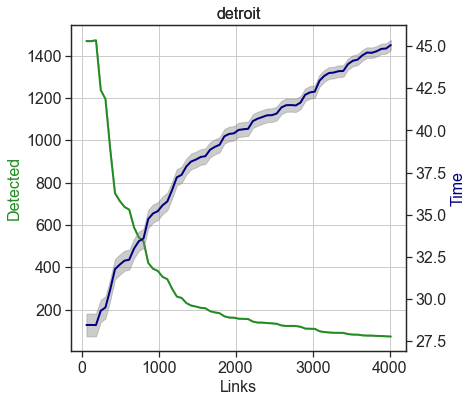

In [5]:
name = 'detroit'
betastr = '2,0'
data = pd.read_csv('out/' + name + '_30k_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'tests', 'detected', 'error'])
sns.set_theme(style="ticks")
fig,axes = plt.subplots(1,1,figsize=(6, 6))
ax1 = axes
ax2 = ax1.twinx()
ax1.plot('links', 'detected', data=data, color='forestgreen', lw=2)
ax1.fill_between(data=data, x=data['links'], y1=data['detected']+ 1*data['error'], y2=data['detected']-1*data['error'], color='gray', alpha=0.4)

ax1.set_title(name, size=16)
ax1.set_xlabel('Links', size=16)
ax1.set_ylabel('Detected', size=16, color='forestgreen')
ax1.tick_params(labelsize=16)

betastr = '2,0'
times = pd.read_csv('out/times/' + name + '_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'time', 'error'])
ax2.plot('links', 'time', data=times, color='navy', lw=2)
ax2.fill_between(data=times, x=times['links'], y1=times['time']+times['error'], y2=times['time']-times['error'], color='gray', alpha=0.4)
ax2.set_title(name, size=16)
ax2.set_xlabel('Links', size=16)
ax2.set_ylabel('Time', size=16, color='navy')
ax2.tick_params(labelsize=16)

ax1.grid('True')

plt.savefig('this.svg', dpi=120, bbox_inches="tight")

In [ ]:
name = 'ma'
betastr = '8,0'
data = pd.read_csv('out/confinement/results/' + name + '_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'time', 'infected', 'error'])
data['infected'].str.extract(r'^([\d]+)\.?').astype(int)

In [ ]:
name = 'ma'
betastr = '4,0'
data = pd.read_csv('out/confinement/results/' + name + '_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'time', 'infected', 'error'])

links = data['links'].drop_duplicates()
colors = cm.get_cmap('inferno_r')

sns.set_theme(style="ticks")
fig,axes = plt.subplots(1,2,figsize=(16, 7))
ax=axes[0]
for l in links:
    ax.plot('time', 'infected', color = colors((l)/(links.max())), data=data[data['links'] == l],
        label=l)
    ax.fill_between(x=data[data['links'] == l]['time'], y1=data[data['links'] == l]['infected']+ 1*data[data['links'] == l]['error'],
        y2=data[data['links'] == l]['infected']-1*data[data['links'] == l]['error'], color='gray', alpha=0.4) 
sm = plt.cm.ScalarMappable(cmap=colors, norm=Normalize(0, links.max()))
cbar=fig.colorbar(sm, ax=ax)


ax.set_xlabel('Time', size=20)
ax.set_ylabel('Infected', size=20)
ax.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Links', size=20)

ax.grid('True')

#fig, ax = plt.subplots(figsize=(8,7))
ax=axes[1]
pivotTable = pd.pivot_table(data, columns='links', index='time', values='infected')

sm = ax.imshow(pivotTable, aspect='auto', extent=(data['links'].min(), data['links'].max(), data['time'].min(), data['time'].max()), origin='lower',
    cmap=plt.cm.inferno ,norm=Normalize())
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Time', size=20, labelpad=-8)
ax.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Infected', size=20)

plt.savefig('beta_' + betastr + '.svg', dpi=120)

In [ ]:
name = 'ma'
betastr = '4,0'
data = pd.read_csv('out/confinement/results/' + name + '_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'time', 'infected', 'error'])

links = data['links'].drop_duplicates()
links = pd.Series([1237, 2474, 6185, 13608, 39589])
data = data[data['links'].isin(links[:])]
data = data[data['links'] > 0]
colors = cm.get_cmap('inferno_r')

sns.set_theme(style="ticks")
fig,axes = plt.subplots(figsize=(8, 7))
ax=axes
for l in links:
    ax.plot('time', 'infected', color = colors((l)/(links.max())), data=data[data['links'] == l],
        label=l)
    ax.fill_between(x=data[data['links'] == l]['time'], y1=data[data['links'] == l]['infected']+ 1*data[data['links'] == l]['error'],
        y2=data[data['links'] == l]['infected']-1*data[data['links'] == l]['error'], color='gray', alpha=0.4) 
sm = plt.cm.ScalarMappable(cmap=colors, norm=Normalize(0, links.max()))
cbar=fig.colorbar(sm, ax=ax)

ax.set_xlim(0, 300)
ax.set_ylim(0, 38000)
ax.set_xlabel('Time', size=20)
ax.set_ylabel('Infected', size=20)
ax.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Links', size=20)

ax.grid('True')
plt.savefig('this.svg', dpi=120, bbox_inches="tight")

# ATTACK RATE

Text(0, 0.5, 'attackRate')

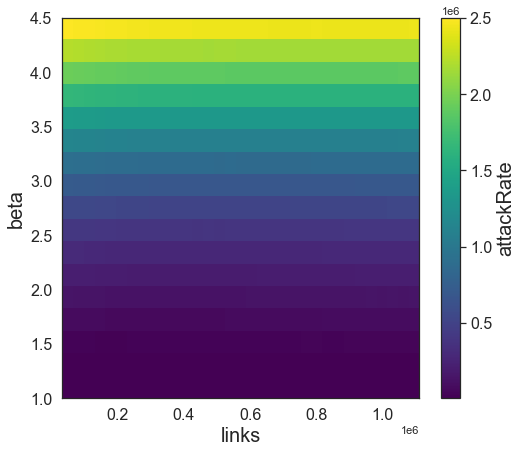

In [4]:
name = 'bogota_transport0'
sns.set_theme(style="white")

fig, ax2 = plt.subplots(1, 1, figsize=(8, 7))
betastr = '2,0'
heatmap = pd.read_csv('out/confinement/trash/attackRate/' + name + '.txt', sep='\t', names=['beta','links', 'attackRate', 'error'])
# PIVOT TABLE

pivotTable = pd.pivot_table(data = heatmap, index = 'beta', columns = 'links', values='attackRate')

colormap = 'viridis'

# Niveles para hacer líneas de contorno blancas (en escala logaritmica)
# np.floor(np.log10(z.min())-4),
lev_exp = np.linspace(np.log10(heatmap['attackRate'].min()+0.00000001), np.log10(heatmap['attackRate'].max()), 10)
# np.ceil(np.log10(z.max())+4), 4)
levs = np.power(10.0, lev_exp)

lev_exp_contour = lev_exp
levs_contour = np.power(10.0, lev_exp_contour)

# imshow para dibujar simplemente el mapa, sin marcar contornos
ax2.imshow(pivotTable, aspect='auto', extent=(heatmap['links'].min(), heatmap['links'].max(), heatmap['beta'].min(), heatmap['beta'].max()),
           origin='lower', cmap=colormap, norm=Normalize(levs.min()+0.001, levs.max()))

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min(levs)+0.001, vmax=max(levs)))
#sm.set_array([])
cbar2 = fig.colorbar(sm, ax=ax2)

ax2.set_xlabel('links', size=20)
ax2.set_ylabel('beta', size=20)
ax2.tick_params(labelsize=16)

cbar2.ax.tick_params(labelsize=16)
cbar2.ax.set_ylabel('attackRate', size=20)

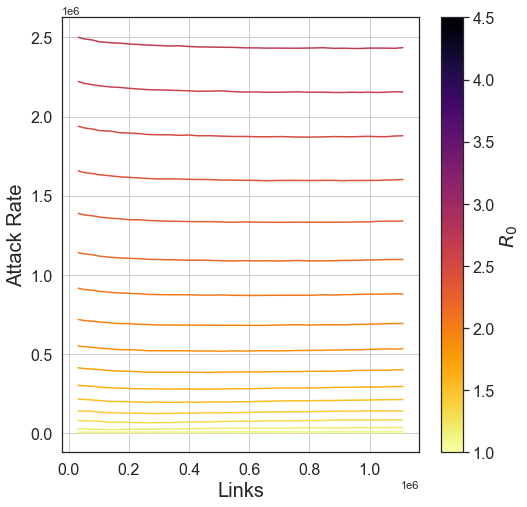

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
linearColor = mpl.cm.get_cmap('inferno_r')
for i,val in enumerate(heatmap['beta'].drop_duplicates()):
    plt.plot('links', 'attackRate', data=heatmap[heatmap['beta']==val], color=linearColor(i/33))
# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=heatmap['beta'].min(), vmax=heatmap['beta'].max()))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)

cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

plt.savefig('bogota_attackrate.pdf', bbox_inches="tight")

In [8]:
heatmap['links'].drop_duplicates()

0       424
1       849
2      1274
3      1699
4      2124
5      2549
6      2974
7      3399
8      3824
9      4248
10     4673
11     5098
12     5523
13     5948
14     6373
15     6798
16     7223
17     7648
18     8072
19     8497
20     8922
21     9347
22     9772
23    10197
24    10622
25    11047
26    11472
27    11896
28    12321
29    12746
30    13171
31    13596
32    14021
Name: links, dtype: int64

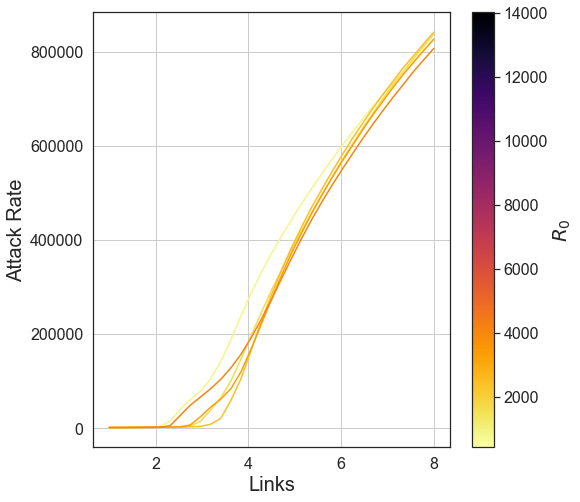

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
linearColor = mpl.cm.get_cmap('inferno_r')
for i,val in enumerate(heatmap['links'].drop_duplicates()):
    if(i%2 & (val < 5000)):
        plt.plot('beta', 'attackRate', data=heatmap[heatmap['links']==val], color=linearColor(i/33))
# COLORBAR
sm = plt.cm.ScalarMappable(cmap=linearColor, norm=Normalize(vmin=heatmap['links'].min(), vmax=heatmap['links'].max()))
#sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)

ax.set_xlabel('Links', size=20)
ax.set_ylabel('Attack Rate', size=20)
ax.tick_params(labelsize=16)

cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel(r'$R_0$', size=20)

ax.grid('True')

plt.savefig('boston_attackrate.pdf', bbox_inches="tight")

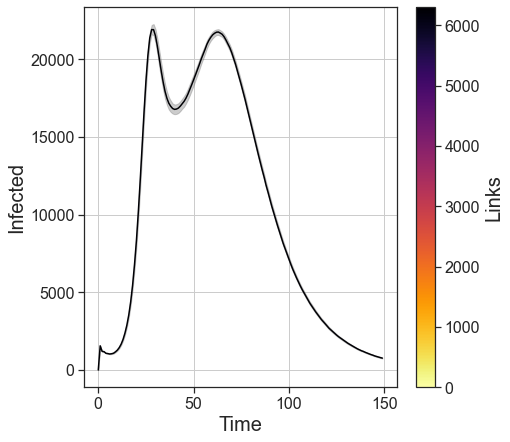

In [25]:
name = 'ma'

data = pd.read_csv('out/confinement_maps/' + name +
                        '.txt', sep='\t', names=['links', 'time', 'infected', 'error'])

links = data['links'].drop_duplicates()
colors = cm.get_cmap('inferno_r')

sns.set_theme(style="ticks")
fig,ax = plt.subplots(figsize=(7, 7))
ax
for l in links:
    ax.plot('time', 'infected', color = colors((l)/(links.max())), data=data[data['links'] == l],
        label=l)
    ax.fill_between(x=data[data['links'] == l]['time'], y1=data[data['links'] == l]['infected']+ 1*data[data['links'] == l]['error'],
        y2=data[data['links'] == l]['infected']-1*data[data['links'] == l]['error'], color='gray', alpha=0.4) 
sm = plt.cm.ScalarMappable(cmap=colors, norm=Normalize(0, links.max()))
cbar=fig.colorbar(sm, ax=ax)


ax.set_xlabel('Time', size=20)
ax.set_ylabel('Infected', size=20)
ax.tick_params(labelsize=16)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('Links', size=20)

ax.grid('True')

plt.savefig('prueba.png', bbox_inches="tight")

# REPRESENTACION MAPA GEOGRAFICO

In [11]:
import geopandas as gpd
counties = gpd.read_file('geo/cty500k/cb_2018_us_county_500k.shp')
counties['centroid'] = counties.centroid
counties['distance'] = counties.distance(counties[counties['GEOID']=='20001']['centroid'].iloc[0])
counties = counties[counties['distance'] < 32]
counties = counties.astype({'GEOID': 'int32'})

/var/folders/68/y4rdzskn3911g1y9ls2qn0ch0000gq/T/ipykernel_1794/1298081110.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['centroid'] = counties.centroid
/var/folders/68/y4rdzskn3911g1y9ls2qn0ch0000gq/T/ipykernel_1794/1298081110.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['distance'] = counties.distance(counties[counties['GEOID']=='20001']['centroid'].iloc[0])


In [12]:
statename = 'ma'
city = 'ma'

states_fips = pd.read_csv('states_fips.txt',sep=',', index_col=0)
statefip = states_fips.loc[statename,'FIPS']

zcta_shp = gpd.read_file('geo/zcta510/tl_2020_us_zcta510.shp')
zcta_shp = zcta_shp.astype({'ZCTA5CE10': 'int64'})

In [13]:
zcta_index = pd.read_csv('cities3/'+statename+'/zcta_index.csv', sep=' ')#.reset_index()

406.25


/var/folders/68/y4rdzskn3911g1y9ls2qn0ch0000gq/T/ipykernel_1794/2849396763.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eigenplot.sort_values('rho',ascending=False).iloc[[0]].set_geometry(eigenplot.centroid).plot(ax=ax, markersize=100, alpha=1, c='red')


536.625


/var/folders/68/y4rdzskn3911g1y9ls2qn0ch0000gq/T/ipykernel_1794/2849396763.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eigenplot.sort_values('rho',ascending=False).iloc[[0]].set_geometry(eigenplot.centroid).plot(ax=ax, markersize=100, alpha=1, c='red')


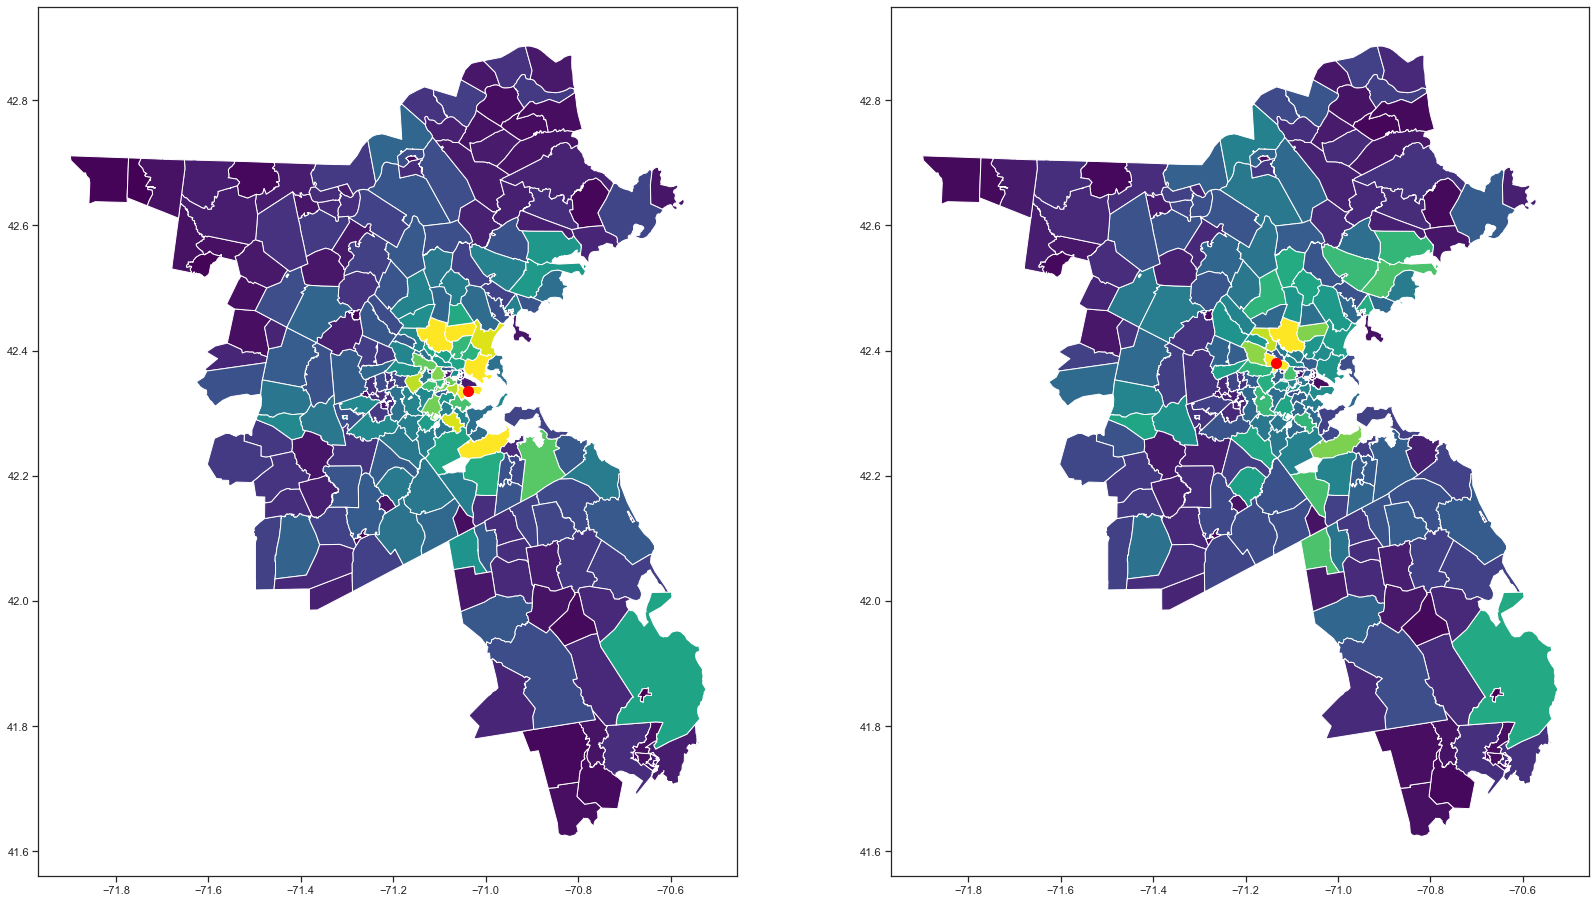

In [19]:
fig,axes = plt.subplots(1,2,figsize=(2*14,2*8))

for i,ax in enumerate(axes):
    zcta_shp_index = zcta_shp.merge(zcta_index, left_on='ZCTA5CE10', right_on='zcta')
    eigen = pd.read_csv('out/confinement_maps/map'+str(i)+'_' + city + '.txt',sep='\t',names=['zcta_index','rho'])
    eigenplot = zcta_shp_index.merge(eigen, on='zcta_index')
    #counties[counties['STATEFP'].astype('int32')==statefip].plot(ax=ax, color='grey')
    eigenplot.plot('rho',ax=ax, cmap='viridis', 
                norm=mpl.colors.Normalize(vmin=0, vmax=350), legend=False,
                missing_kwds= dict(color = "lightgrey",))
    print(eigenplot['rho'].max())
    #eigenplot.merge(cities, on='zcta').dissolve(by='city').boundary.plot(ax = ax, color='w', linewidth=.3)
    eigenplot.sort_values('rho',ascending=False).iloc[[0]].set_geometry(eigenplot.centroid).plot(ax=ax, markersize=100, alpha=1, c='red')

plt.savefig('prueba.png', bbox_inches="tight")